In [311]:
import numpy as np
import pandas as pd
import sklearn

In [312]:
print("numpy",np.__version__)
print("pandas",pd.__version__)
print("sklearn",sklearn.__version__)

numpy 1.26.4
pandas 2.2.2
sklearn 1.5.1


In [2]:
df = pd.read_csv('emails.csv')

In [3]:
df.sample(5)

,text,spam
4682,Subject: re : enron offsite hi steve : liste...,0
3160,Subject: customer profiling meeting bob shult...,0
3744,"Subject: tiger team info vince , here is the...",0
2916,Subject: re : meeting re : wharton strategy j...,0
2617,Subject: non - firm power curve building hi v...,0


In [4]:
df.shape

(5728, 2)

In [5]:
# 1. Data Cleaning
# 2. EDA
# 3. Text preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [7]:
# removal of columns not needed as their is already two columns and there is no null values present

In [8]:
# renaming the cols
df.rename (columns = {'text': 'messages','spam': 'target'}, inplace=True)
df.sample(5)

,messages,target
4030,Subject: re : test vince : candice ' s conta...,0
860,Subject: perfect visual solution for your busi...,1
233,Subject: in the heart of your business ! corp...,1
2301,Subject: organizational announcement in case ...,0
4117,"Subject: larry thorpe hi vince , been meanin...",0


In [9]:
# In target we already have mapping 1-spam and 0-Not Spam so no need to encode this 

In [10]:
#missing values
df.isnull().sum()

messages    0
target      0
dtype: int64

In [11]:
#check for duplicate values
df.duplicated().sum()

33

In [12]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5695, 2)

# 2. EDA

In [15]:
df.head()

,messages,target
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [16]:
df['target'].value_counts()

target
0    4327
1    1368
Name: count, dtype: int64

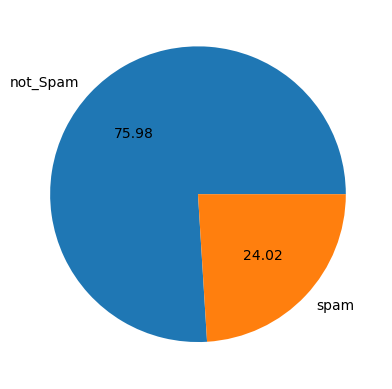

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['not_Spam', 'spam'], autopct="%0.2f")
plt.show()

In [18]:
#Data is slightly imbalanced

In [19]:
import nltk

In [20]:
!pip install nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sevan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_characters']= df['messages'].apply(len)

In [23]:
df.head()

,messages,target,num_characters
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [24]:
#num of words
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sevan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [25]:
df['num_words'] = df['messages'].apply(lambda x:len (nltk.word_tokenize(x)))

In [26]:
df.head()

,messages,target,num_characters,num_words
0,Subject: naturally irresistible your corporate...,1,1484,325
1,Subject: the stock trading gunslinger fanny i...,1,598,90
2,Subject: unbelievable new homes made easy im ...,1,448,88
3,Subject: 4 color printing special request add...,1,500,99
4,"Subject: do not have money , get software cds ...",1,235,53


In [27]:
df['num_sentences'] = df['messages'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,messages,target,num_characters,num_words,num_sentences
0,Subject: naturally irresistible your corporate...,1,1484,325,11
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1
2,Subject: unbelievable new homes made easy im ...,1,448,88,4
3,Subject: 4 color printing special request add...,1,500,99,5
4,"Subject: do not have money , get software cds ...",1,235,53,9


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5695.000000,5695.000000,5695.000000
mean,1558.067076,328.214047,19.462511
std,2047.078711,419.654234,35.981993
min,13.000000,3.000000,1.000000
25%,508.500000,102.000000,7.000000
50%,979.000000,211.000000,12.000000
75%,1893.000000,403.000000,22.000000
max,43952.000000,8479.000000,1565.000000


In [30]:
# for ham messages separately
df[df['target'] == 0 ][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4327.000000,4327.000000,4327.000000
mean,1634.200139,347.283799,19.838225
std,1965.016383,407.227757,38.124564
min,13.000000,3.000000,1.000000
25%,577.500000,120.000000,7.000000
50%,1122.000000,240.000000,13.000000
75%,2037.500000,440.500000,22.000000
max,43952.000000,8479.000000,1565.000000


In [31]:
# for spam messages separately
df[df['target'] == 1 ][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1368.000000,1368.000000,1368.000000
mean,1317.257310,267.896199,18.274123
std,2271.372893,451.623124,28.130434
min,18.000000,5.000000,1.000000
25%,401.500000,80.000000,6.000000
50%,693.500000,141.000000,11.000000
75%,1250.250000,252.000000,18.000000
max,28432.000000,6131.000000,438.000000


In [32]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

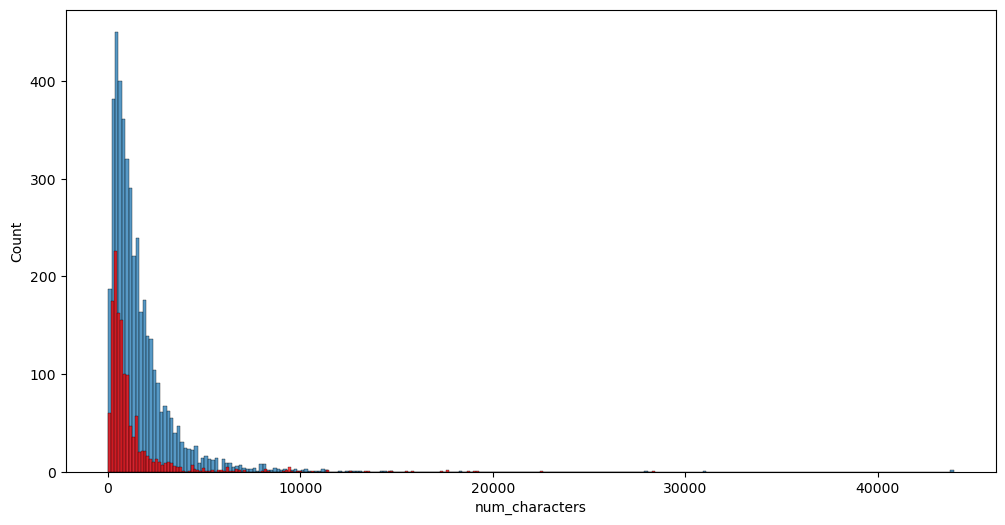

In [33]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target']== 0]['num_characters'])
sns.histplot(df[df['target']== 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

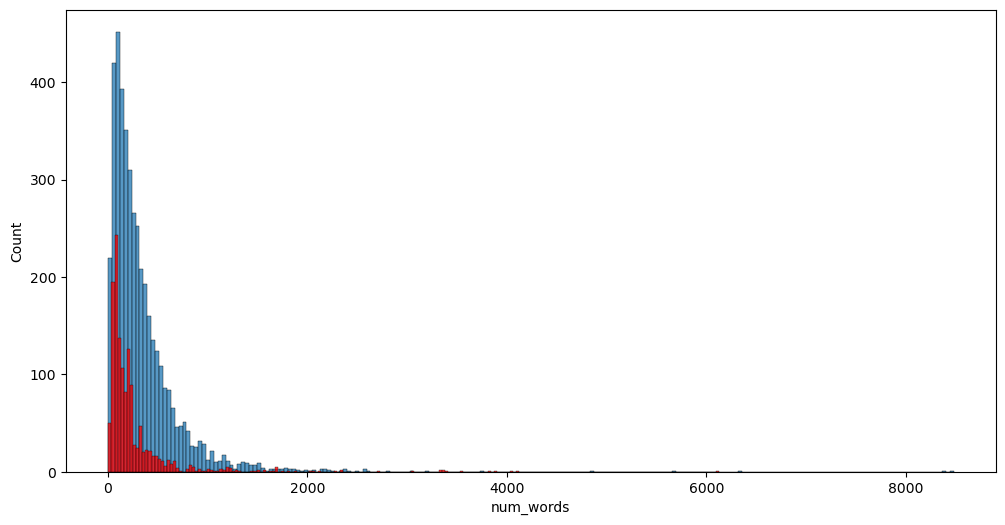

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target']== 0]['num_words'])
sns.histplot(df[df['target']== 1]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

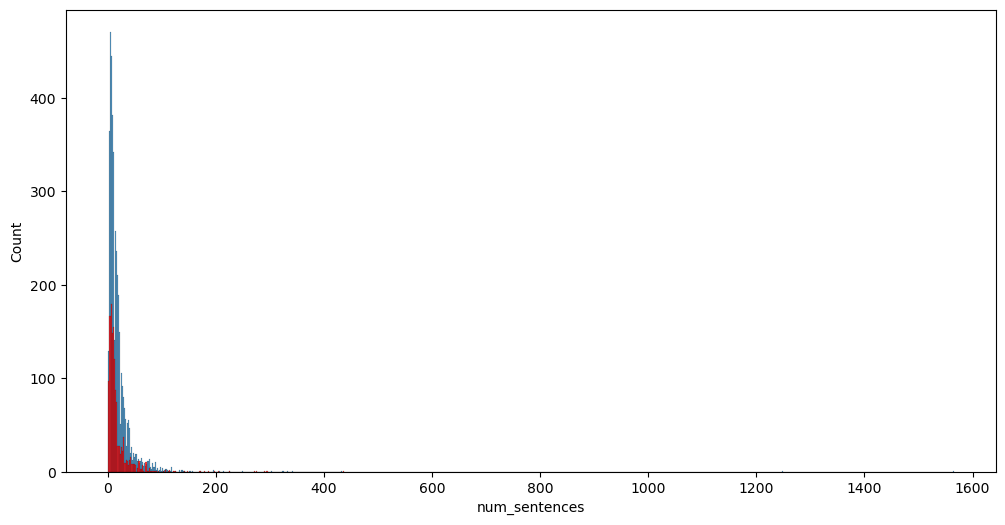

In [35]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target']== 0]['num_sentences'])
sns.histplot(df[df['target']== 1]['num_sentences'], color='red')

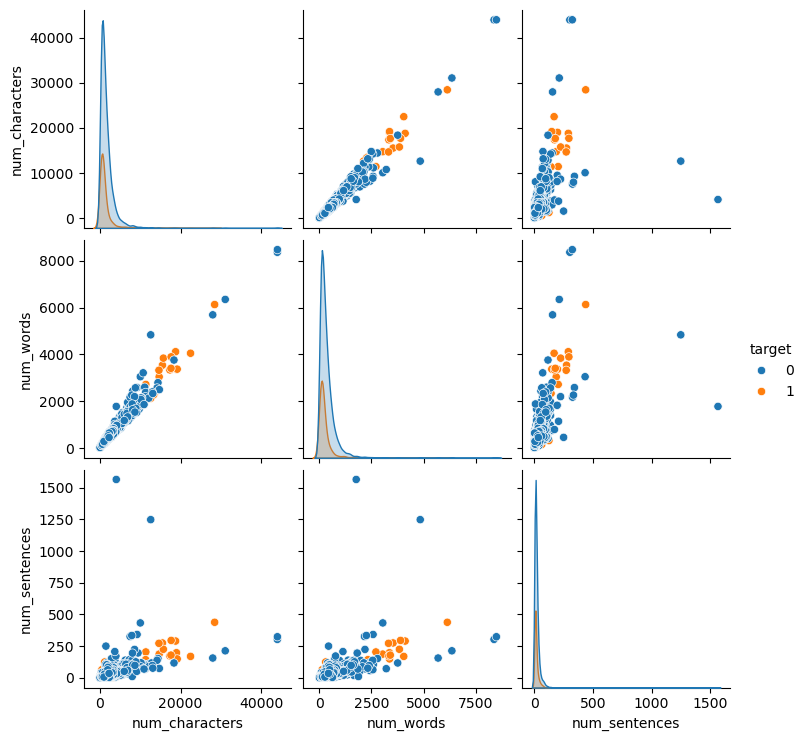

In [36]:
sns.pairplot(df, hue='target')

<Axes: >

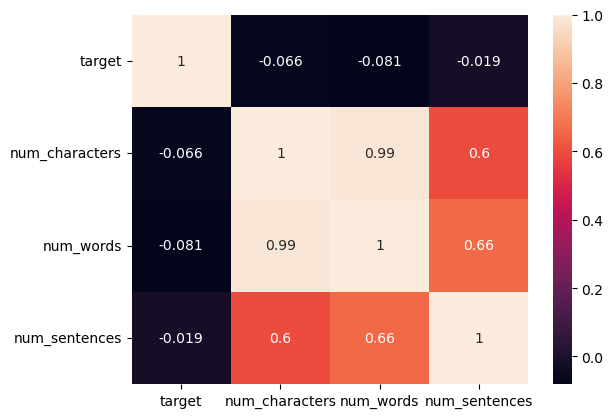

In [37]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)

# 3. Data Preprocessing
  lowercase
  Tokenization
  Removing special characters
  Removing stop words and Punctuations
  Stemming

In [38]:
import string
import nltk
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [40]:
def transform_messages(messages):
    messages = messages.lower()
    messages = nltk.word_tokenize(messages)
    y = []
    for i in messages:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [41]:
transform_messages(" Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  marketing break - through shouldn ' t make gaps in your budget . 100 % satisfaction  guaranteed : we provide unlimited amount of changes with no extra fees for you to  be surethat you will love the result of this collaboration . have a look at our  portfolio _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ not interested . . . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _")

'subject natur irresist corpor ident lt realli hard recollect compani market full suqgest inform isoverwhelminq good catchi logo stylish statloneri outstand websit make task much easier promis havinq order iogo compani automaticaili becom world ieader isguit ciear without good product effect busi organ practic aim hotat nowaday market promis market effort becom much effect list clear benefit creativ hand made origin logo special done reflect distinct compani imag conveni logo stationeri provid format easi use content manag system letsyou chang websit content even structur prompt see logo draft within three busi day afford market break make gap budget 100 satisfact guarante provid unlimit amount chang extra fee surethat love result collabor look portfolio interest'

In [42]:
df['messages'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [43]:
df['transformed_messages'] = df['messages'].apply(transform_messages)

In [44]:
df.head()

,messages,target,num_characters,num_words,num_sentences,transformed_messages
0,Subject: naturally irresistible your corporate...,1,1484,325,11,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,235,53,9,subject money get softwar cd softwar compat gr...


In [45]:
!pip install wordcloud

In [46]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [47]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_messages'].str.cat(sep=" "))
# I have to change this to messages -> Transformed messages 

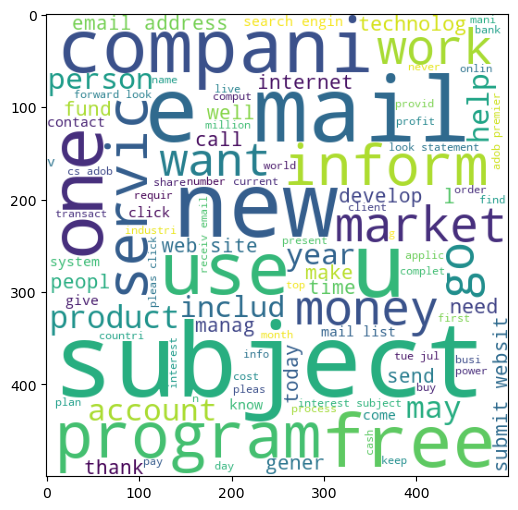

In [48]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [49]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_messages'].str.cat(sep=" "))

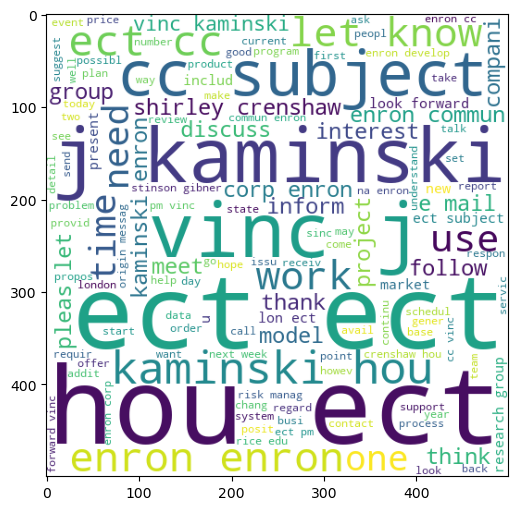

In [50]:
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

In [51]:
df.head()

,messages,target,num_characters,num_words,num_sentences,transformed_messages
0,Subject: naturally irresistible your corporate...,1,1484,325,11,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,235,53,9,subject money get softwar cd softwar compat gr...


In [52]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_messages'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [53]:
spam_corpus

['subject',
 'natur',
 'irresist',
 'corpor',
 'ident',
 'lt',
 'realli',
 'hard',
 'recollect',
 'compani',
 'market',
 'full',
 'suqgest',
 'inform',
 'isoverwhelminq',
 'good',
 'catchi',
 'logo',
 'stylish',
 'statloneri',
 'outstand',
 'websit',
 'make',
 'task',
 'much',
 'easier',
 'promis',
 'havinq',
 'order',
 'iogo',
 'compani',
 'automaticaili',
 'becom',
 'world',
 'ieader',
 'isguit',
 'ciear',
 'without',
 'good',
 'product',
 'effect',
 'busi',
 'organ',
 'practic',
 'aim',
 'hotat',
 'nowaday',
 'market',
 'promis',
 'market',
 'effort',
 'becom',
 'much',
 'effect',
 'list',
 'clear',
 'benefit',
 'creativ',
 'hand',
 'made',
 'origin',
 'logo',
 'special',
 'done',
 'reflect',
 'distinct',
 'compani',
 'imag',
 'conveni',
 'logo',
 'stationeri',
 'provid',
 'format',
 'easi',
 'use',
 'content',
 'manag',
 'system',
 'letsyou',
 'chang',
 'websit',
 'content',
 'even',
 'structur',
 'prompt',
 'see',
 'logo',
 'draft',
 'within',
 'three',
 'busi',
 'day',
 'afford',

In [54]:
len(spam_corpus)

174630

C:\Users\sevan\AppData\Local\Temp\ipykernel_2808\3513459698.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_spam['Word'], y=df_spam['Count'], palette="viridis")  # You can try "magma", "coolwarm", etc.


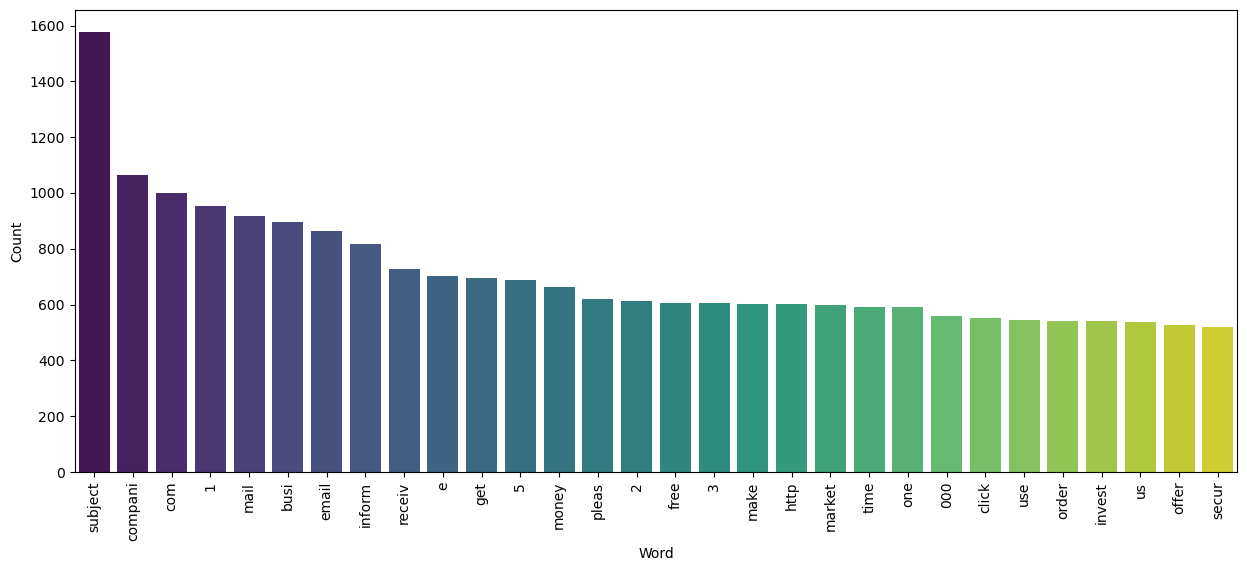

In [55]:
# from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
# plt.xticks(rotation='vertical')
from collections import Counter

# Convert Counter to DataFrame with named columns
df_spam = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])

# Create the barplot with different colors
plt.figure(figsize=(15, 6))
sns.barplot(x=df_spam['Word'], y=df_spam['Count'], palette="viridis")  # You can try "magma", "coolwarm", etc.
# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')
plt.show()

In [56]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_messages'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [57]:
ham_corpus

['subject',
 'hello',
 'guy',
 'bug',
 'complet',
 'questionnair',
 'one',
 'page',
 'bio',
 'statement',
 'thought',
 'busi',
 'edu',
 'new',
 'economi',
 'record',
 'incorrect',
 'pleas',
 'ship',
 'respons',
 'want',
 'put',
 'everyth',
 'togeth',
 'next',
 'week',
 'ship',
 'back',
 'everyon',
 'questionnair',
 'attach',
 'well',
 'copi',
 'bio',
 'page',
 'michael',
 'froehl',
 'two',
 'somewhat',
 'differ',
 'approach',
 'idea',
 'latter',
 'introduc',
 'panelist',
 'give',
 'background',
 'approach',
 'issu',
 'discuss',
 'also',
 'provid',
 'copi',
 'attende',
 'use',
 'materi',
 'person',
 'introduct',
 'open',
 'panel',
 'discuss',
 'thank',
 'look',
 'forward',
 'see',
 'two',
 'week',
 'john',
 'waco',
 'background',
 'mf',
 'doc',
 'jmartinbiosketch',
 'doc',
 'questionnair',
 'doc',
 'john',
 'martin',
 'carr',
 'p',
 'collin',
 'chair',
 'financ',
 'financ',
 'depart',
 'baylor',
 'univers',
 'po',
 'box',
 '98004',
 'waco',
 'tx',
 '76798',
 '254',
 '710',
 '4473',
 'of

In [58]:
len(ham_corpus)

702991

C:\Users\sevan\AppData\Local\Temp\ipykernel_2808\1297375888.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_ham['Word'], y=df_ham['Count'], palette="viridis")  # You can try "magma", "coolwarm", etc.


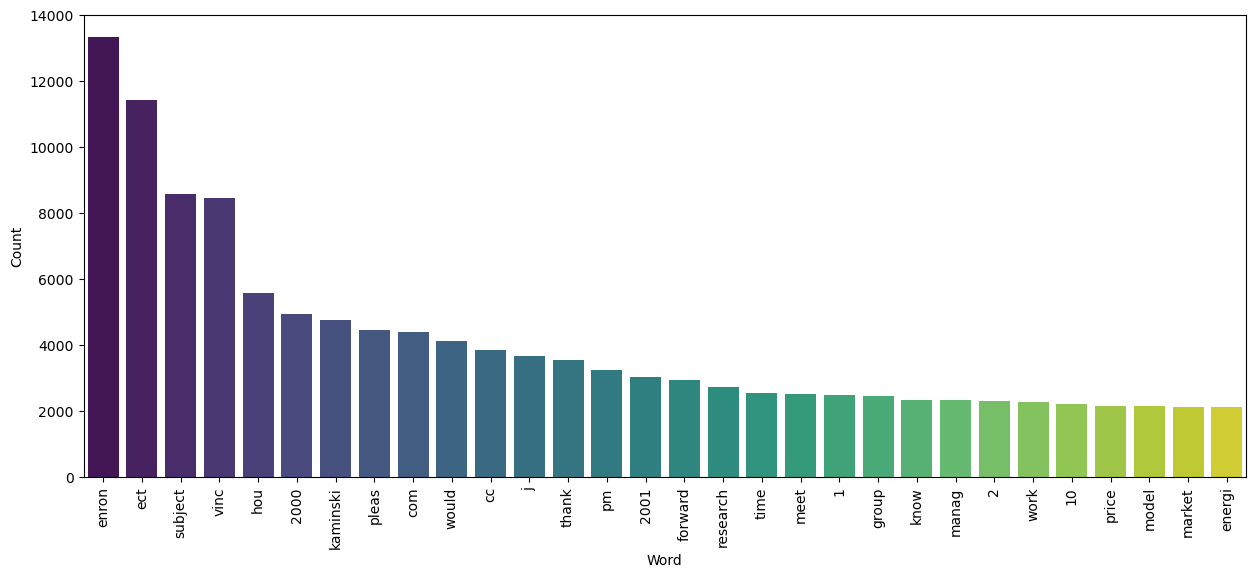

In [59]:
from collections import Counter

# Convert Counter to DataFrame with named columns
df_ham = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])

# Create the barplot with different colors
plt.figure(figsize=(15, 6))
sns.barplot(x=df_ham['Word'], y=df_ham['Count'], palette="viridis")  # You can try "magma", "coolwarm", etc.
# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Buiding

In [293]:
# Text Vectorization
# 1. Using Bag of Words
df.head()

,messages,target,num_characters,num_words,num_sentences,transformed_messages
0,Subject: naturally irresistible your corporate...,1,1484,325,11,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,235,53,9,subject money get softwar cd softwar compat gr...


In [294]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [295]:
# X = cv.fit_transform(df['transformed_messages']).toarray()
X = tfidf.fit_transform(df['transformed_messages']).toarray()

In [296]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [229]:
# # appending the num_character col to X
# X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [297]:
X.shape

(5695, 3000)

In [299]:
y = df['target'].values

In [300]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [302]:
from sklearn.model_selection import train_test_split

In [303]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [304]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [305]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [306]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print (precision_score(y_test,y_pred1))

0.9525899912203687
[[837  12]
 [ 42 248]]
0.9538461538461539


In [307]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print (precision_score(y_test,y_pred2))

0.9877085162423178
[[840   9]
 [  5 285]]
0.9693877551020408


In [241]:
bnb.fit(X_train,y_train)
y_pred3 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print (precision_score(y_test,y_pred3))

0.9877085162423178
[[840   9]
 [  5 285]]
0.9693877551020408


In [242]:
# tfidf-->MNB

In [243]:
!pip install xgboost

In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [245]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc =LogisticRegression(solver = 'liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [246]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [247]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy, precision

In [248]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.95171202809482, 0.9272727272727272)

In [249]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.95171202809482
Precision -  0.9272727272727272
For  KN
Accuracy -  0.6453028972783144
Precision -  0.41786743515850144
For  NB
Accuracy -  0.9877085162423178
Precision -  0.9693877551020408
For  DT
Accuracy -  0.9236172080772608
Precision -  0.8048048048048048
For  LR
Accuracy -  0.9841966637401229
Precision -  0.9822695035460993
For  RF
Accuracy -  0.9824407374890255
Precision -  0.9927007299270073


C:\Users\sevan\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9692712906057945
Precision -  0.967032967032967
For  BgC
Accuracy -  0.9657594381035997
Precision -  0.9403508771929825
For  ETC
Accuracy -  0.9833187006145742
Precision -  0.9927272727272727
For  GBDT
Accuracy -  0.9561018437225637
Precision -  0.9651162790697675
For  xgb
Accuracy -  0.9850746268656716
Precision -  0.9690721649484536


In [250]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy': accuracy_scores, 'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [251]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.983319,0.992727
5,RF,0.982441,0.992701
4,LR,0.984197,0.982270
2,NB,0.987709,0.969388
10,xgb,0.985075,0.969072
6,AdaBoost,0.969271,0.967033
9,GBDT,0.956102,0.965116
7,BgC,0.965759,0.940351
0,SVC,0.951712,0.927273
3,DT,0.923617,0.804805


In [260]:
performance_df1 = pd.melt(performance_df,id_vars = "Algorithm")

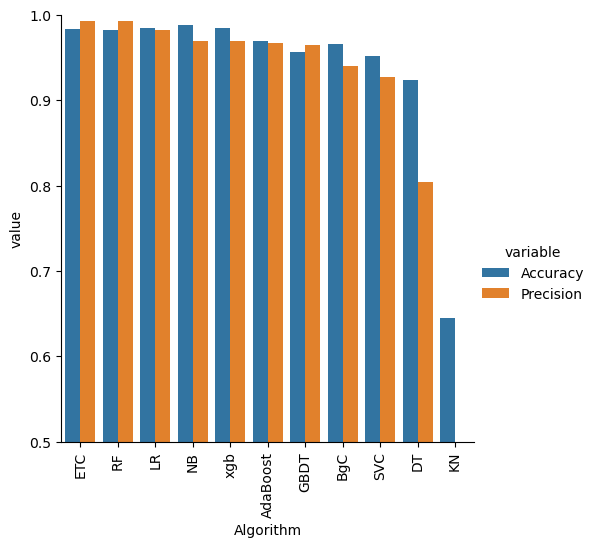

In [261]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable', data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [262]:
#model improve
# 1. Change the max_features parameter of TFIDf

In [267]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_max_ft_3000':accuracy_scores, 'Precision_max_ft_3000':precision_scores})

In [268]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [269]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,ETC,0.983319,0.992727,0.983319,0.992727
1,RF,0.982441,0.992701,0.982441,0.992701
2,LR,0.984197,0.982270,0.984197,0.982270
3,NB,0.987709,0.969388,0.987709,0.969388
4,xgb,0.985075,0.969072,0.985075,0.969072
5,AdaBoost,0.969271,0.967033,0.969271,0.967033
6,GBDT,0.956102,0.965116,0.956102,0.965116
7,BgC,0.965759,0.940351,0.965759,0.940351
8,SVC,0.951712,0.927273,0.951712,0.927273
9,DT,0.923617,0.804805,0.923617,0.804805


In [270]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_scalling':accuracy_scores,'Precision_scalling':precision_scores})

In [217]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accurary_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [271]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [272]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scalling,Precision_scalling
0,ETC,0.983319,0.992727,0.983319,0.992727,0.983319,0.992727
1,RF,0.982441,0.992701,0.982441,0.992701,0.982441,0.992701
2,LR,0.984197,0.982270,0.984197,0.982270,0.984197,0.982270
3,NB,0.987709,0.969388,0.987709,0.969388,0.987709,0.969388
4,xgb,0.985075,0.969072,0.985075,0.969072,0.985075,0.969072
5,AdaBoost,0.969271,0.967033,0.969271,0.967033,0.969271,0.967033
6,GBDT,0.956102,0.965116,0.956102,0.965116,0.956102,0.965116
7,BgC,0.965759,0.940351,0.965759,0.940351,0.965759,0.940351
8,SVC,0.951712,0.927273,0.951712,0.927273,0.951712,0.927273
9,DT,0.923617,0.804805,0.923617,0.804805,0.923617,0.804805


In [280]:
#Voting Classifier
# svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
etc =ExtraTreesClassifier(n_estimators=50,random_state=2)
rf = RandomForestClassifier()
lr = LogisticRegression()
mnb = MultinomialNB()
from sklearn.ensemble import VotingClassifier

In [281]:
# voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')
voting = VotingClassifier(estimators=[('nb',mnb),('et',etc),('RF',rf),('LR',lr)],voting='soft')

In [282]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('RF', RandomForestClassifier()),
                             ('LR', LogisticRegression())],
                 voting='soft')

In [283]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9912203687445127
Precision 0.9929577464788732


In [289]:
#Apply stacking
estimators =[('LR',lr),('nb',mnb),('ETC',etc)]
final_estimator=RandomForestClassifier()

In [290]:
from sklearn.ensemble import StackingClassifier

In [291]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [292]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9920983318700615
Precision 0.9929824561403509


In [308]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))